In [96]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [97]:
df=pd.read_csv("../Time_series/Gia SMP va SMPcap 2021(Giá thị trường SMP).csv", encoding="latin-1")

In [98]:
feats= ['6']

In [99]:


# Đọc dữ liệu từ file CSV, specify encoding as 'latin-1' or 'utf-8'
df = pd.read_csv("D:/visualstudiocode/Time_series/Gia SMP va SMPcap 2021(Giá thị trường SMP).csv", delimiter=';', header=None, encoding='latin-1')

# Định nghĩa feats là cột thứ 7
feats = ['6']

# Initialize the StandardScaler
transformer = StandardScaler()

# Use the StandardScaler to fit and transform the data
X = transformer.fit_transform(np.array(df.iloc[:, 6]).reshape(-1, 1))


In [100]:
BGM = BayesianGaussianMixture(n_components=7,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [101]:
pp=BGM.predict_proba(X)# Calcualting the probabilities of each prediction
df_new=pd.DataFrame(X,columns=feats)
df_new[[f'predict_proba_{i}' for i in range(7)]]=pp # creating new dataframe columns of probabilites
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)

train_index=np.array([])
for n in range(7):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.68)].index
    train_index = np.concatenate((train_index, n_inx))

In [102]:
#ricopue's notebook's code snippet
from sklearn.model_selection import StratifiedKFold
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7}

model_list=[]

gkf = StratifiedKFold(11)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)

    model = lgb.train(params = params_lgb,
                train_set = tr_dataset,
                valid_sets =  vl_dataset,
                num_boost_round = 5000,
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])

    model_list.append(model)

[200]	valid_0's multi_logloss: 0.000260991
[200]	valid_0's multi_logloss: 0.0811413
[200]	valid_0's multi_logloss: 0.000251668
[200]	valid_0's multi_logloss: 0.000264172
[400]	valid_0's multi_logloss: 0.000264172
[200]	valid_0's multi_logloss: 0.000254938
[200]	valid_0's multi_logloss: 0.000263749
[200]	valid_0's multi_logloss: 0.0118206
[400]	valid_0's multi_logloss: 0.0118206
[600]	valid_0's multi_logloss: 0.0118205
[800]	valid_0's multi_logloss: 0.0118205
[1000]	valid_0's multi_logloss: 0.0118205
[1200]	valid_0's multi_logloss: 0.0118204
[1400]	valid_0's multi_logloss: 0.0118204
[1600]	valid_0's multi_logloss: 0.0118204
[1800]	valid_0's multi_logloss: 0.0118204
[2000]	valid_0's multi_logloss: 0.0118204
[2200]	valid_0's multi_logloss: 0.0118204
[2400]	valid_0's multi_logloss: 0.0118204
[2600]	valid_0's multi_logloss: 0.0118204
[2800]	valid_0's multi_logloss: 0.0118204
[3000]	valid_0's multi_logloss: 0.0118203
[3200]	valid_0's multi_logloss: 0.0118203
[3400]	valid_0's multi_logloss: 0

In [103]:
BGM = BayesianGaussianMixture(n_components=7,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [104]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [105]:
labels=np.argmax(lgb_preds,axis=1)

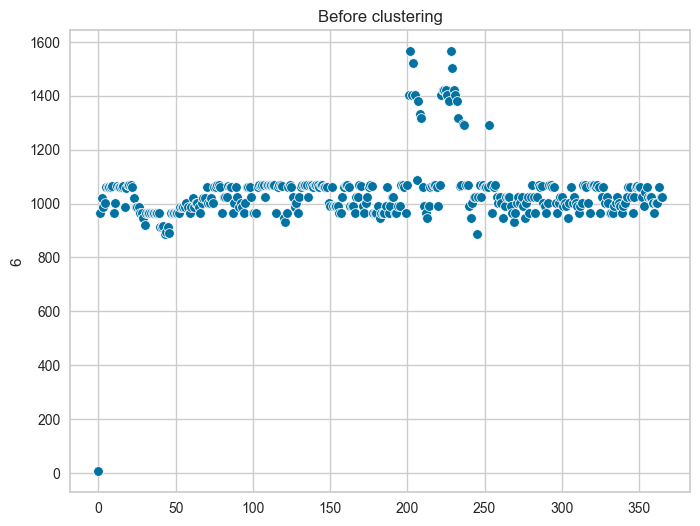

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(label="bla")
sns.scatterplot(df.iloc[:, 6], marker='o')  # Scatter plot of the 7th column
ax.set_title("Before clustering")
plt.show()


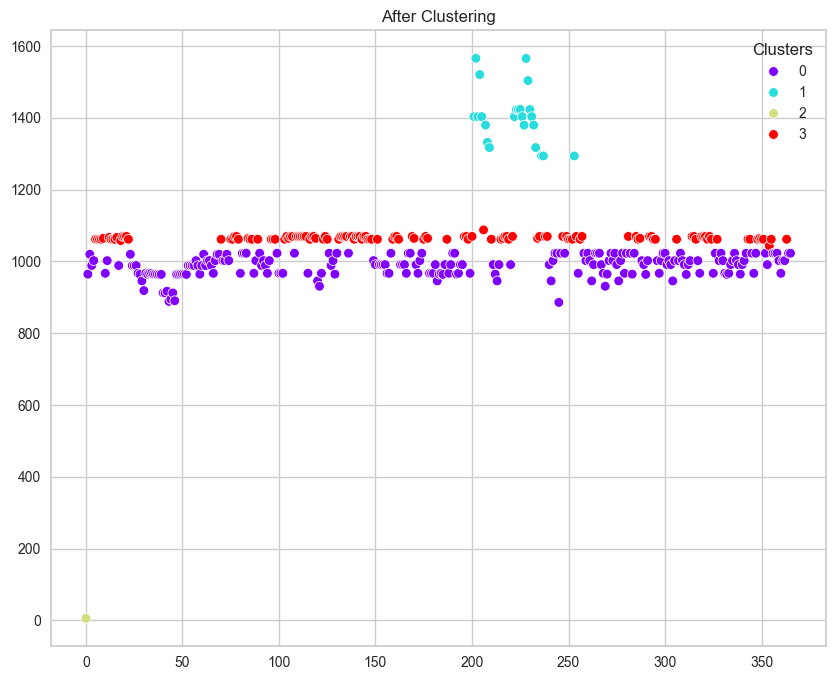

In [107]:
# Định nghĩa feats là cột thứ 7
feats = [6]

# Initialize the StandardScaler
transformer = StandardScaler()

# Use the StandardScaler to fit and transform the data
X = transformer.fit_transform(np.array(df.iloc[:, feats[0]]).reshape(-1, 1))

# Hiển thị scatterplot
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=range(len(df[feats])), y=df[feats].values.flatten(), hue=df["Clusters"], palette="rainbow", ax=ax)
ax.set_title("After Clustering")
plt.show()

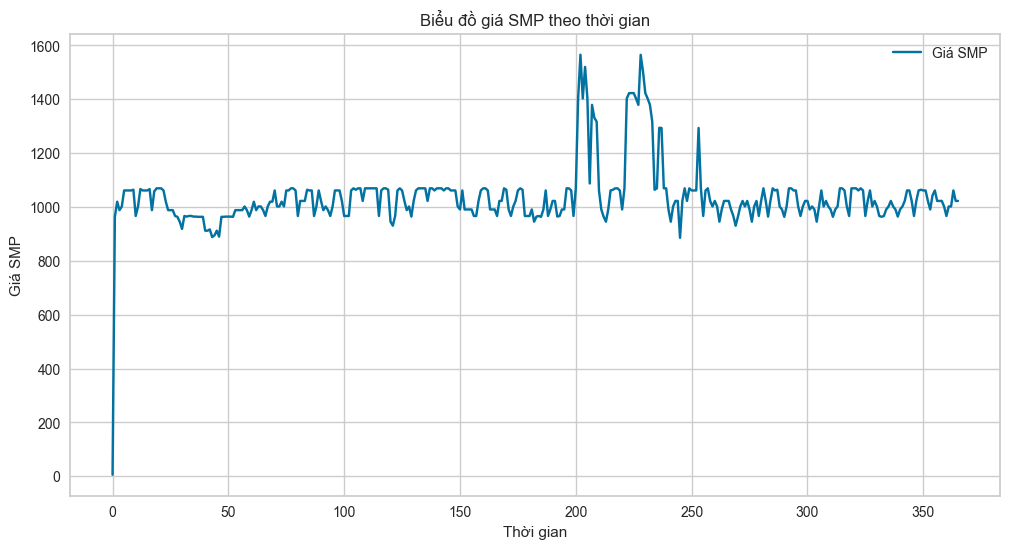

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Tải dữ liệu
data = np.loadtxt('./Gia SMP va SMPcap 2021(Giá thị trường SMP).csv', delimiter=';', usecols=[6])

# Vẽ biểu đồ chuỗi thời gian
plt.figure(figsize=(12, 6))
plt.plot(data, label='Giá SMP')
plt.title('Biểu đồ giá SMP theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá SMP')
plt.legend()
plt.show()


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import norm  


X_train, X_test, y_train, y_test = train_test_split(data[:-30], data[30:], test_size=0.3, random_state=42)
mean, std_dev = norm.fit(X_train)
y_pred_gaussian = norm.rvs(loc=mean, scale=std_dev, size=len(X_test))
mse_gaussian = mean_squared_error(y_test, y_pred_gaussian)
print("Mean Squared Error (Gaussian):", mse_gaussian)



Mean Squared Error (Gaussian): 23938.694286447007


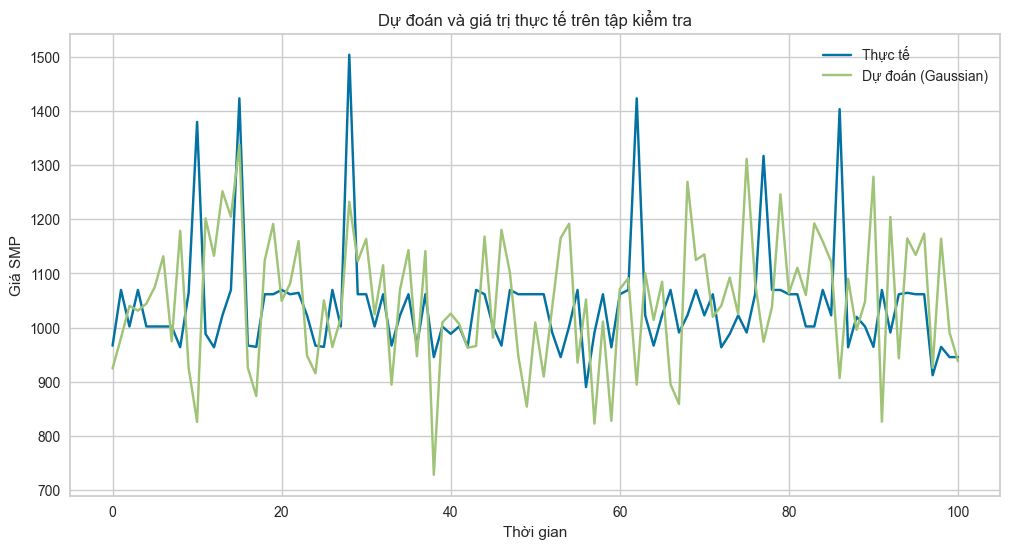

In [110]:
import matplotlib.pyplot as plt
n_test = len(X_test)
plt.figure(figsize=(12, 6))
plt.plot(range(n_test), y_test[:n_test], label='Thực tế')
plt.plot(range(n_test), y_pred_gaussian[:n_test], label='Dự đoán (Gaussian)')
plt.title('Dự đoán và giá trị thực tế trên tập kiểm tra')
plt.xlabel('Thời gian')
plt.ylabel('Giá SMP')
plt.legend()
plt.show()

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




X_train, X_test, y_train, y_test = train_test_split(data[:-30], data[30:], test_size=0.3, random_state=42)


X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)



# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)  # Example n_estimators, you can adjust this
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)



mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)


Mean Squared Error (Random Forest): 11887.60866195816


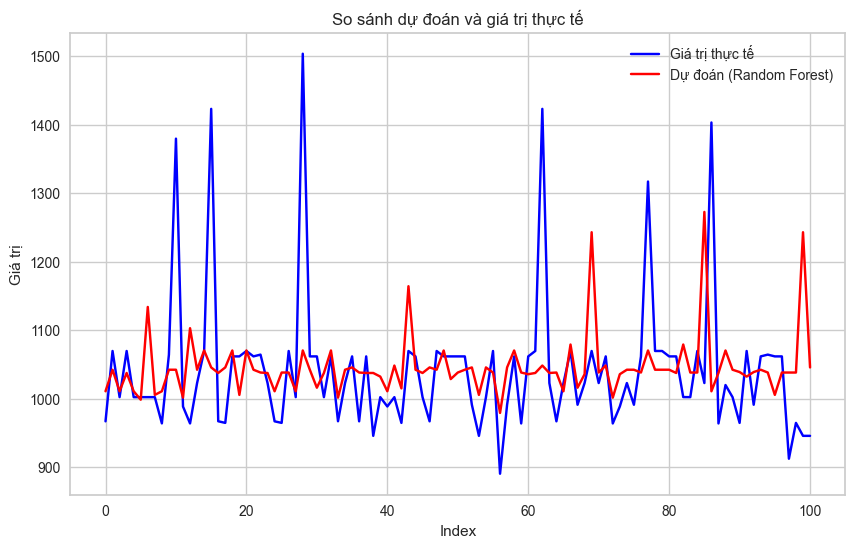

In [112]:
import matplotlib.pyplot as plt

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Giá trị thực tế', color='blue')
plt.plot(y_pred_rf, label='Dự đoán (Random Forest)', color='red')
plt.xlabel('Index')
plt.ylabel('Giá trị')
plt.title('So sánh dự đoán và giá trị thực tế')
plt.legend()
plt.show()


In [113]:
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


In [114]:
from sklearn.metrics import mean_squared_error


mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error (Linear Regression):", mse_lr)


rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
print("Root Mean Squared Error (Linear Regression):", rmse_lr)


Mean Squared Error (Linear Regression): 11578.550958358477
Root Mean Squared Error (Linear Regression): 107.60367539428417


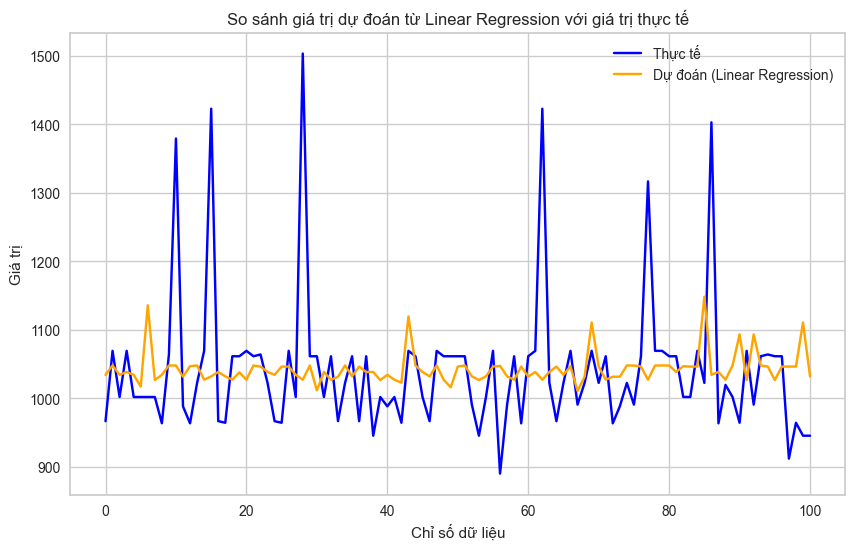

In [115]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


plt.plot(y_test, label='Thực tế', color='blue')

plt.plot(y_pred_lr, label='Dự đoán (Linear Regression)', color='orange')


plt.title('So sánh giá trị dự đoán từ Linear Regression với giá trị thực tế')
plt.xlabel('Chỉ số dữ liệu')
plt.ylabel('Giá trị')


plt.legend()


plt.show()
